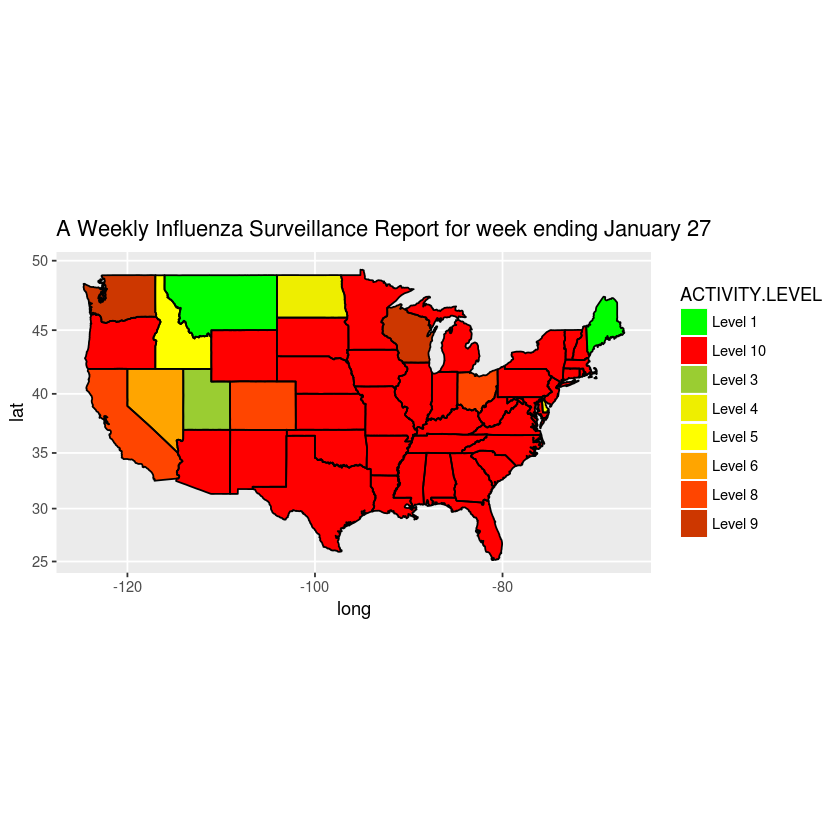

In [1]:
# sujitjit - 50247206
# gautamav - 50245840
# US Heatmap for the weekly influenza surveillance report
# importing required libraries
library(ggplot2)  
library(maps) 

# importing data from csv file
influenza_data <- read.csv("Data/StateDataforMap_2017-18week4.csv")

# extracting states data from maps library
state_data <-map_data("state")

# creating the region column in the imported dataset  
influenza_data$region = tolower(influenza_data$STATENAME)

# merging the dataframe from library and local file mapping it by region
influenza_data_map <- merge(state_data, influenza_data, by = "region", all.x = T)

# ordering the resultant dataset by column name -> order
influenza_data_map <-influenza_data_map[order(influenza_data_map$order), ]

# defining color scheme for the maps
colors = c("green","red","olivedrab3","yellow2","yellow","orange","orangered1","orangered3","aquamarine2","orange","red","black","white")

# implementation of heatmap goes here
ggplot(influenza_data_map, aes(x=long,y=lat,group=group)) + # plotting the map based on merged data, grouping data by groups
    geom_polygon(aes(fill=ACTIVITY.LEVEL)) + # using polygon fill for each states depending on ACTIVITY.LEVEL
    geom_path() + # to show boundaries of each state
    scale_fill_manual(values =colors) + # manual color fill to discrete scale
    coord_map() + # mapping as per coordinate
    ggtitle("A Weekly Influenza Surveillance Report for week ending January 27") # defining title for the maps

No encoding supplied: defaulting to UTF-8.


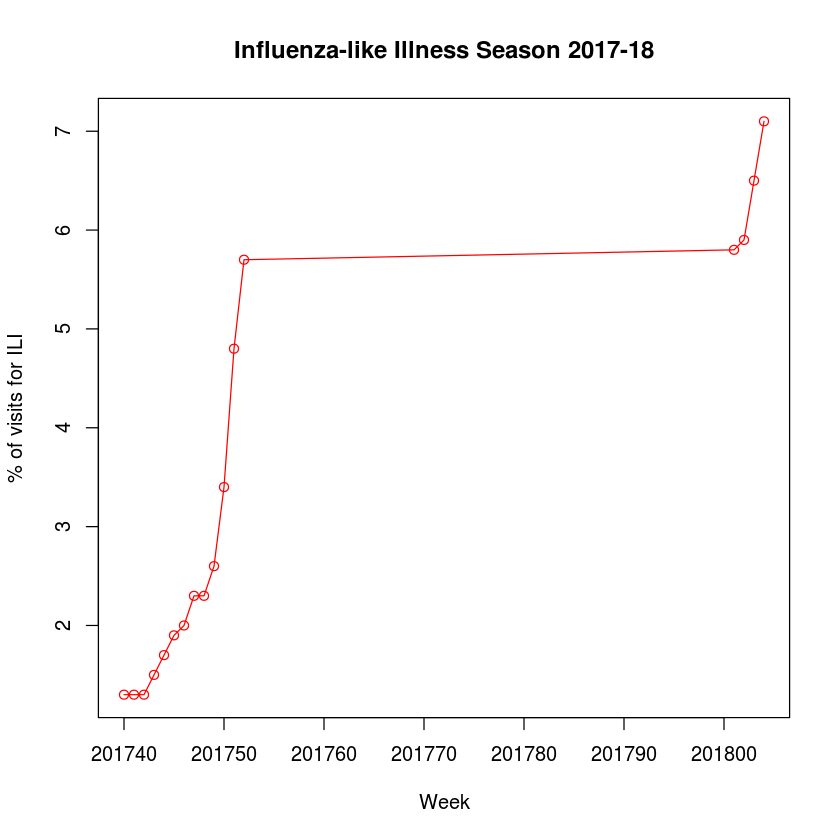

In [2]:
# Influenza-like Illness Season 2017-18
# importing libraries
library(htmltab)

# defining the data source
url <- "https://www.cdc.gov/flu/weekly/weeklyarchives2017-2018/data/senAllregt04.html"

# screen scrapping of data from html table
influenza_like.table <- htmltab(doc = url, which = "//th[text() = 'Week']/ancestor::table")

# defining axes
y <- c(influenza_like.table[,10])
x <- c(influenza_like.table[,1])

# Ploting graph
plot(x,y,type = 'o', col = 'red', main='Influenza-like Illness Season 2017-18', xlab = 'Week', ylab = '% of visits for ILI') 




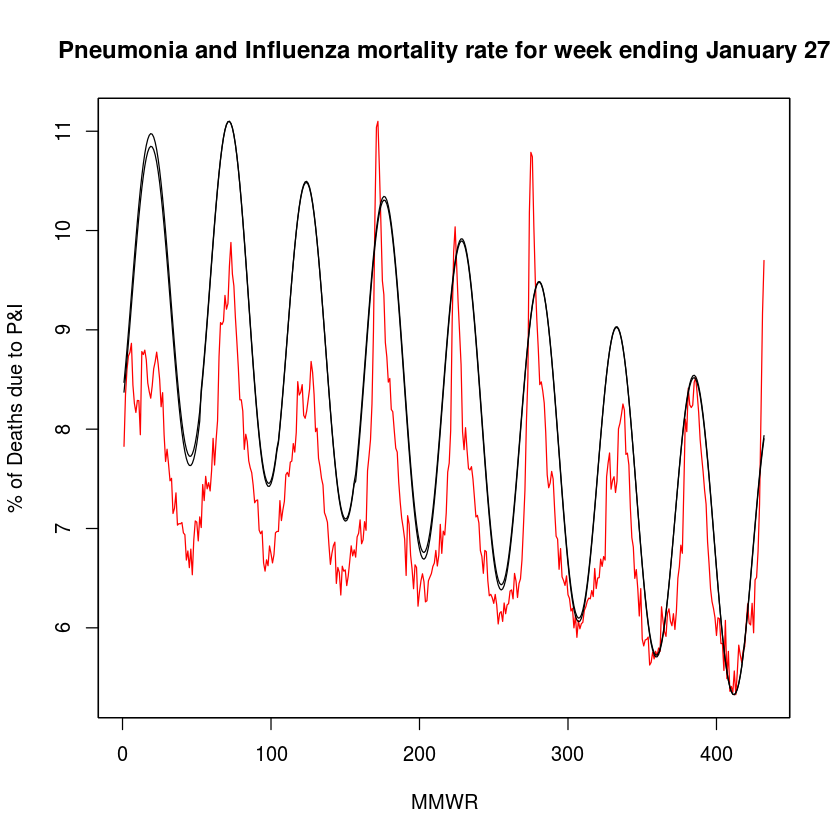

In [3]:
# Pneumonia and Influenza mortality rate for week ending January 27
# importing data
mortality <- read.csv('Data/NCHSData04.csv')

# defining axes
x <- c(1:432)
y <- c(mortality[,3])

# plotting graph for % Deaths due to Pneumonia and Influenza
plot(x, y, col="red", type = "l", xlab = "MMWR", ylab = "% of Deaths due to P&I", main="Pneumonia and Influenza mortality rate for week ending January 27")

# Creating new parameter
par(new = TRUE)

# defining axis for the new parameter
y <- c(mortality[,4])

# ploting grapph for expected result
plot(x,y,type = "l", xaxt = 'n', yaxt = 'n', ann = FALSE)

# creating new parameter
par(new = TRUE)

# defining axes for the new parameter
y <- c(mortality[,5])

# plotting graph for the actual result
plot(x,y,type = "l", xaxt = 'n', yaxt = 'n', ann = FALSE)

No encoding supplied: defaulting to UTF-8.


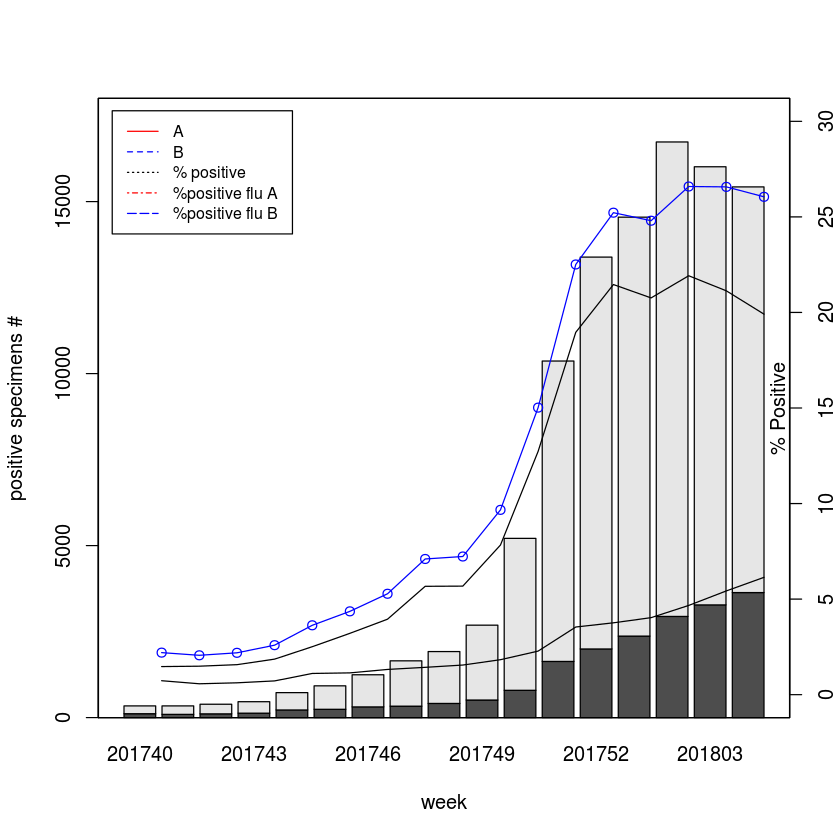

In [4]:
library(htmltab) # include the htmltab library

url <- "https://www.cdc.gov/flu/weekly/weeklyarchives2017-2018/data/whoAllregt_cl04.html" # url for scraping

infl_test <- htmltab(doc = url, which = "//th[text() = 'Week']/ancestor::table") 
#extracts data from the url starting from table header tag th = Week 


# BAR PLOT
data <- data.frame(infl_test[3], infl_test[2]) #extract required columns 
mat = as.matrix(data) # convert to matrix for barplot 
x <- infl_test[1] # x axis labels 
barplot(t(mat),ylim = c(0,18000),names.arg=t(x), xlab = "week", ylab = "positive specimens #")


par(new = TRUE) # over lay of plots 

# Line Plot 1 
y <- infl_test[7]
plot(y, type = 'o', col = 'blue', ylim = c(0,30), xlim = c(0,17), xaxt = 'n', yaxt = 'n', ann = FALSE)


par(new = TRUE)

#Line Plot 2
y <- infl_test[4]
plot(y, type = 'l', col = 'black',ylim=c(0,30), xlim = c(0,17), xaxt = 'n', yaxt = 'n', ann = FALSE)  

par(new = TRUE)

#Line plot 3 
y <- infl_test[5]
plot(y, type = 'l', col = 'black', ylim=c(0,30), xlim = c(0,17), xaxt = 'n',yaxt = 'n', ylab = "% Positive", ann = FALSE)

# Y axis on the right side 
axis(side=4)
mtext("% Positive", side=4, line=-1)

#set Legend for the plot
legend("topleft", inset = 0.02, legend=c("A","B", "% positive", "%positive flu A","%positive flu B"),
       col=c("red", "blue", "black", "red", "blue" ), lty=1:5, cex=0.8)





No encoding supplied: defaulting to UTF-8.


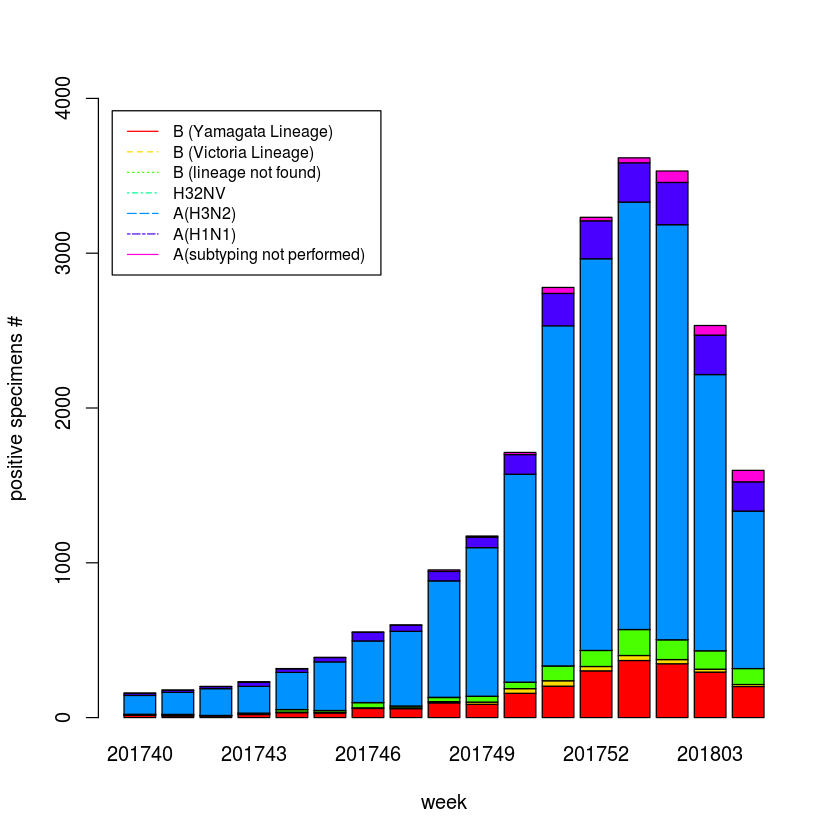

In [5]:
library(htmltab) #import the library htmltab for scraping

# scraping
url <- "https://www.cdc.gov/flu/weekly/weeklyarchives2017-2018/data/whoAllregt_phl04.html" #desired url 
infl_test <- htmltab(doc = url, which = "//th[text() = 'Week']/ancestor::table") 
# scrape the csv by searching for Week in table header tag in the given URLs H

# extract the required data from the csv 
data <- data.frame(infl_test[9], infl_test[8], infl_test[7], infl_test[2], infl_test[4], infl_test[3], infl_test[6])
mat = as.matrix(data) # convert to matrix fro barplot 
x <- infl_test[1] # x axis labels 
barplot(t(mat),ylim = c(0,4000),names.arg=t(x), xlab = "week", ylab = "positive specimens #",col = rainbow(7))

#set legend
legend("topleft", inset = 0.02, legend=c("B (Yamagata Lineage)", "B (Victoria Lineage)", "B (lineage not found)", "H32NV", "A(H3N2)", "A(H1N1)",  "A(subtyping not performed)"),
       col=rainbow(7), lty=1:7, cex=0.8)



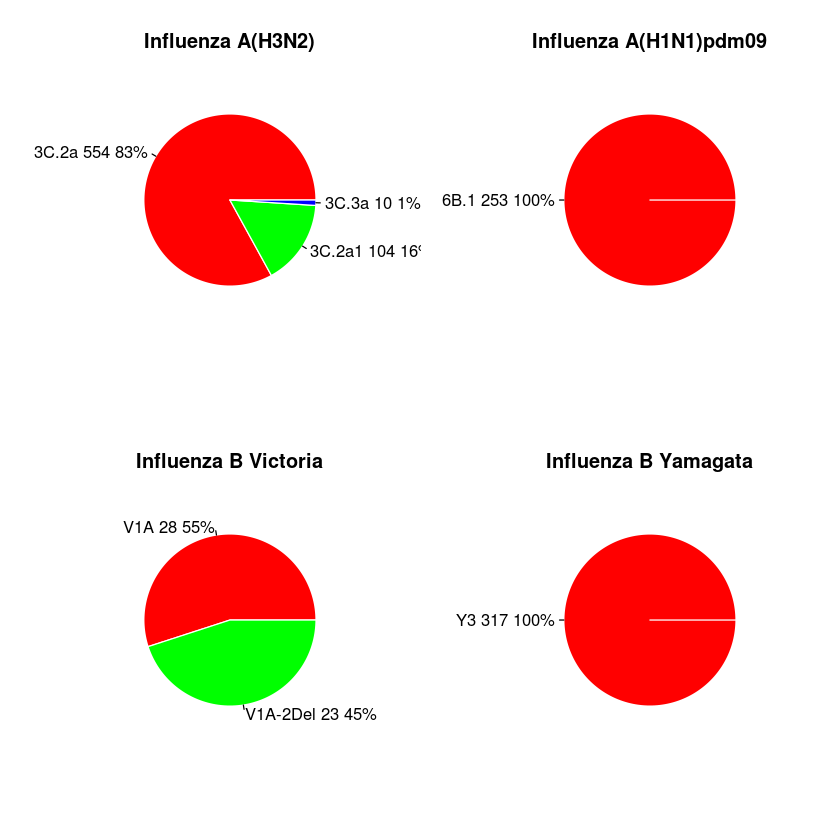

In [6]:


fun <- function (flag, infl_list) {
    # this function retrieves the % column and then creates a numeric vector from it by dropping the % character 
	x = infl_list[flag==TRUE,4]
	x = sub("%","",x) #remove %
	x = as.numeric(x) #convert to integer 
	x = x[x!=0] #remove 0 entries 
	x = x[!is.na(x)] # remove NA entries  
	return (x)
}


infl_list <- read.csv("Data/Genetic04.csv") # read csv 


flag1 = infl_list[1] == 'B/Victoria' # position where B/Victoria is present in the csv 
flag2 =  infl_list[1] == 'B/Yamagata' # postion where B/Yamagata is present in the csv  
flag3 = infl_list[1] == 'H1pdm09'
flag4 = infl_list[1] == 'H3'


par(mfrow = c(2,2)) # divide the plot in 2 x 2 section 
x1 = fun(flag1,infl_list) # retrieve the percentage for corresponding viruses using flags 
x2 = fun(flag2,infl_list)
x3 = fun(flag3,infl_list)
x4 = fun(flag4,infl_list)

          
# s1 s2 and s3 are helper strings that will be used as labels in the pie charts 

#PIE 1          
s1 = paste(infl_list[9,2], infl_list[9,3] , infl_list[9,4]) 
s2 = paste(infl_list[10,2] , infl_list[10,3] , infl_list[10,4])
s3 = paste(infl_list[11,2], infl_list[11,3] , infl_list[11,4])
pie(x4, col = rainbow(3), border = "white", main = "Influenza A(H3N2)",
labels = c(s1,s2,s3)
)

#PIE 2
s1 = paste(infl_list[6,2], infl_list[6,3] , infl_list[6,4])
pie(x3, col = rainbow(3), border = "white", main = "Influenza A(H1N1)pdm09",
label = s1)

#PIE 3
s1 = paste(infl_list[1,2], infl_list[1,3] , infl_list[1,4])
s2 = paste(infl_list[2,2], infl_list[2,3] , infl_list[2,4])

pie(x1, col = rainbow(3), border = "white", main = "Influenza B Victoria",
label = c(s1,s2))

#PIE 4 
s1 = paste(infl_list[3,2], infl_list[3,3] , infl_list[3,4])
pie(x2, col = rainbow(3), border = "white", main = "Influenza B Yamagata",
label = s1)




